In [4]:
!pip install stopwords

  Obtaining dependency information for stopwords from https://files.pythonhosted.org/packages/71/0c/abe48ef37283bc846ce5b80c585f00e065eb90bfc935dfd37ad67a4af896/stopwords-1.0.1-py2.py3-none-any.whl.metadata


In [5]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install requests beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [ ]:
https://www.bcentral.cl/inicio

In [2]:
import requests
from bs4 import BeautifulSoup

# URL de la página web que deseas hacer scraping
url = 'https://www.bcentral.cl/inicio'

# Realizar una petición GET a la página web
response = requests.get(url)

# Verificar que la petición fue exitosa (código de estado HTTP 200)
if response.status_code == 200:
    # Parsear el contenido HTML de la página web usando BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extraer el título de la página
    title = soup.title.text  # .text extrae el texto del elemento
    
    print("Título de la página:", title)
else:
    print("Error al acceder a la página:", response.status_code)


Título de la página: Inicio - Banco Central de Chile


In [3]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.bcentral.cl/inicio'
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extraer el título de la página
    title = soup.title.text
    print("Título de la página:", title)
    
    # Extraer todos los enlaces de la página
    links = soup.find_all('a')  # Encuentra todos los elementos <a>
    for link in links:
        href = link.get('href')  # Obtiene el atributo href de cada enlace
        if href:
            print(href)
else:
    print("Error al acceder a la página:", response.status_code)


Título de la página: Inicio - Banco Central de Chile
#main-content
#0
#0
#0
/c/portal/update_language?p_l_id=3297165&redirect=%2Finicio&languageId=en_US
https://www.bcentral.cl/web/banco-central
#;
https://www.bcentral.cl/web/banco-central/columna_1
https://www.bcentral.cl/web/banco-central/el-banco/gobierno-corporativo
https://www.bcentral.cl/web/banco-central/el-banco/gobierno-corporativo/funciones-del-banco
https://www.bcentral.cl/web/banco-central/el-banco/gobierno-corporativo/personas
https://www.bcentral.cl/web/banco-central/el-banco/historia
https://www.bcentral.cl/web/banco-central/el-banco/planificacion-estrategica
https://www.bcentral.cl/web/banco-central/evaluaciones-externas
https://www.bcentral.cl/web/banco-central/el-banco/relaciones-internacionales
https://www.bcentral.cl/web/banco-central/el-banco/relacion-con-la-ciudadania
https://www.bcentral.cl/web/banco-central/el-banco/relacion-con-la-ciudadania/patrimonio
https://portalbiblioteca.bcentral.cl
http://www.centralentu

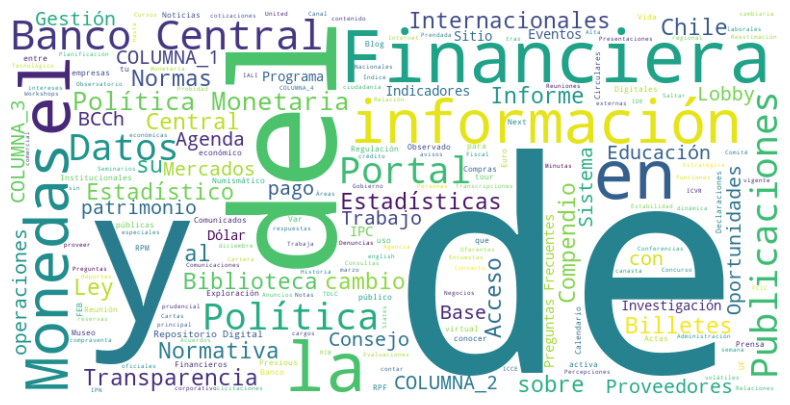

In [10]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# URL de la página web que deseas hacer scraping
url = 'https://www.bcentral.cl/inicio'
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extraer todos los textos de enlaces de la página
    links_text = ' '.join(link.text for link in soup.find_all('a') if link.text)
    
    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(links_text)
    
    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("Error al acceder a la página:", response.status_code)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Diego\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


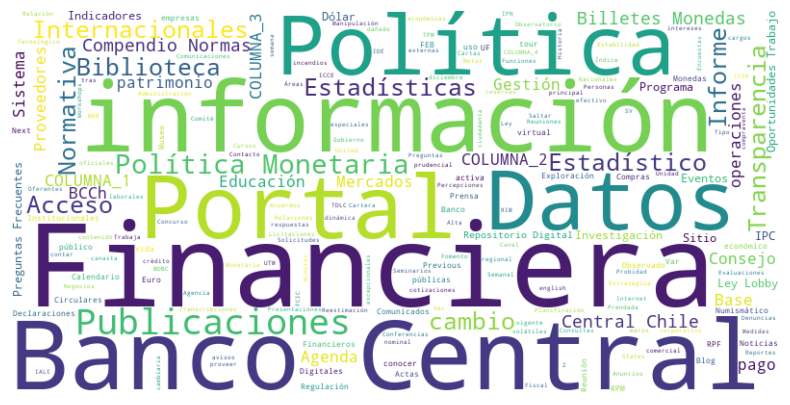

In [12]:
import nltk
from nltk.corpus import stopwords

# Descargar la lista de stopwords de NLTK
nltk.download('stopwords')

# Cargar las stopwords en español (cambia 'spanish' por 'english' si tu texto está en inglés)
stop_words = set(stopwords.words('spanish'))

# Filtrar las stopwords de tu texto
filtered_text = ' '.join(word for word in links_text.split() if word.lower() not in stop_words)

# Ahora, generar la nube de palabras usando el texto filtrado
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
